# Training logs for min move strategy, fixed10
Fixed LUDR, 10 lines per move, 4 repeats

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../logs')

In [2]:
def plotn(names, title, legend=False, rate=1):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    ax1 = axes[0]
    ax2 = axes[1]
    maxscore = []
    for i, name0 in enumerate(names):
        logs0 = np.load(name0, allow_pickle=True)
        t_loss0 = logs0['t_loss']
        scores0 = logs0['min_move']
        epochs0 = np.arange(len(t_loss0))
        
        ax1.semilogy(epochs0, t_loss0, color=plt.cm.tab10(i))
        ax2.plot(np.arange(0, len(t_loss0), 1/rate), scores0, color=plt.cm.tab10(i))
        maxscore.append(max(scores0))
    if legend:
        ax1.legend(legend, loc='upper right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Min move score')
    print(logs0['params'])
    plt.title(title)
    plt.show()
    return maxscore

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.1, name='', path='selfplay/fixed10/', patience=10, pretrained='', seed=0, soft=3.0, t_tuple=[0, 3400])


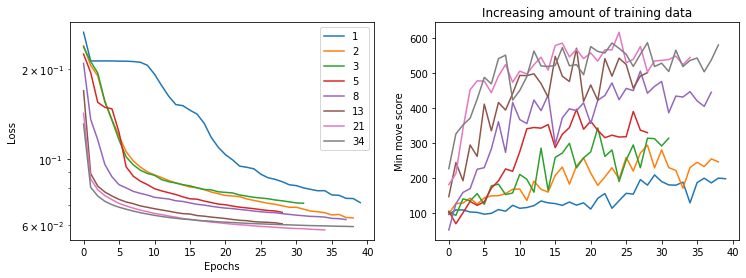

[209.075, 293.975, 342.775, 395.925, 504.725, 570.125, 615.625, 585.875]


In [3]:
blocks = [1,2,3,5,8,13,21,34]
names = [
    '20200213/0_100_soft3.0c64b3_p10_bs2048lr0.1d0.0_s2.npz',
    '20200213/0_200_soft3.0c64b3_p10_bs2048lr0.1d0.0_s0.npz',
    '20200213/0_300_soft3.0c64b3_p10_bs2048lr0.1d0.0_s0.npz',
    '20200213/0_500_soft3.0c64b3_p10_bs2048lr0.1d0.0_s2.npz',
    '20200213/0_800_soft3.0c64b3_p10_bs2048lr0.1d0.0_s2.npz',
    '20200213/0_1300_soft3.0c64b3_p10_bs2048lr0.1d0.0_s0.npz',
    '20200213/0_2100_soft3.0c64b3_p10_bs2048lr0.1d0.0_s4.npz',
    '20200213/0_3400_soft3.0c64b3_p10_bs2048lr0.1d0.0_s0.npz',
    ]

maxscore = plotn(names, 'Increasing amount of training data', legend=blocks)
print(maxscore)

In [4]:
tries = [1+int(n[-5]) for n in names]
print(tries)
strike_rate = len(tries) / sum(tries)
print(f'Strike rate: {strike_rate}')

[3, 1, 1, 3, 3, 1, 5, 1]
Strike rate: 0.4444444444444444


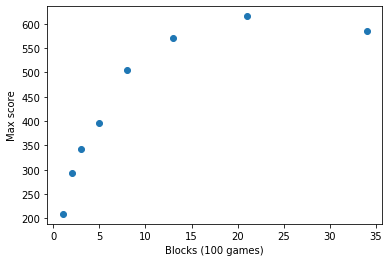

In [5]:
plt.scatter(blocks, maxscore)
plt.xlabel('Blocks (100 games)')
plt.ylabel('Max score')
plt.show()

Looks like a power law model:  
$$score = scale * blocks^{power} \\
log(score) = log(scale) + power * log(blocks)$$
Starting to plateau at 21 blocks

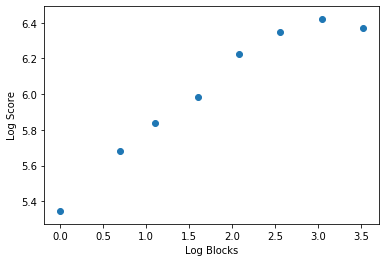

In [6]:
plt.scatter(np.log(blocks), np.log(maxscore))
plt.xlabel('Log Blocks')
plt.ylabel('Log Score')
plt.show()

In [9]:
power, logscale = np.polyfit(np.log(blocks[1:-2]), np.log(maxscore[1:-2]), 1)
scale = np.exp(logscale)
print(power, scale)

0.36206744198574586 228.54280325063215


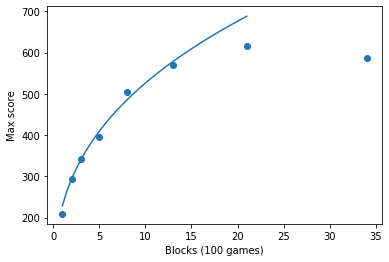

In [11]:
xx = np.linspace(1, 21)
plt.scatter(blocks, maxscore)
plt.plot(xx, scale * xx ** power)
plt.xlabel('Blocks (100 games)')
plt.ylabel('Max score')
plt.show()

Although 34 was weaker in this test, it actually was slightly stronger in the full 5000 game eval. It is clear, however, that gains are decreasing. I think 2000 games is good enough for a strong network. To make than many with neural network will probably take a while.